In [1]:
import time 
import emcee
import getdist
import numpy as np
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
%matplotlib inline

Removed no burn in
min chi square is : 486.08050030417013


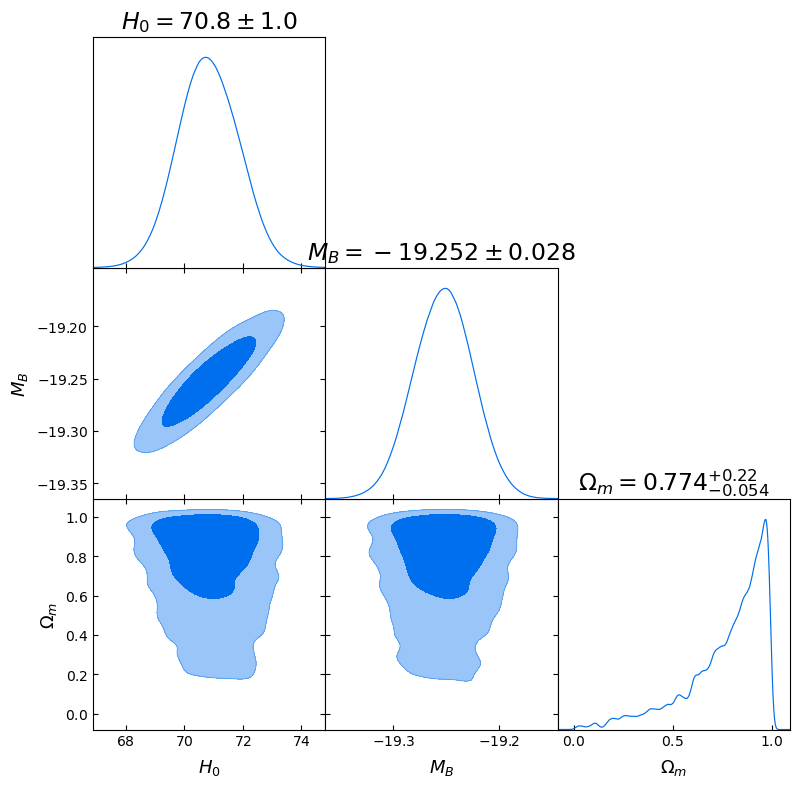

In [2]:
LCDM = emcee.backends.HDFBackend("../Chains/MB(SH0ES)+LocalSN/LambdaCDM.h5",
                                 read_only=True)
tau = LCDM.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))

flatchainLCDM = LCDM.get_chain(discard=burnin, flat=True, thin=thin)
loglikevalues = LCDM.get_log_prob(discard=burnin, flat=True, thin=thin)
parmLCDM = tuple(['H_0', 'M_B', '\Omega_m'])
flatLCDM = MCSamples(samples=flatchainLCDM, names=parmLCDM, labels=parmLCDM)
g = plots.get_subplot_plotter()
g.settings.subplot_size_inch = 3
g.settings.title_limit_fontsize = 18
g.triangle_plot(flatLCDM, filled=True, title_limit=1)
print("min chi square is :", -2 * max(loglikevalues))

Removed no burn in
min chi square is : 480.7151586179868


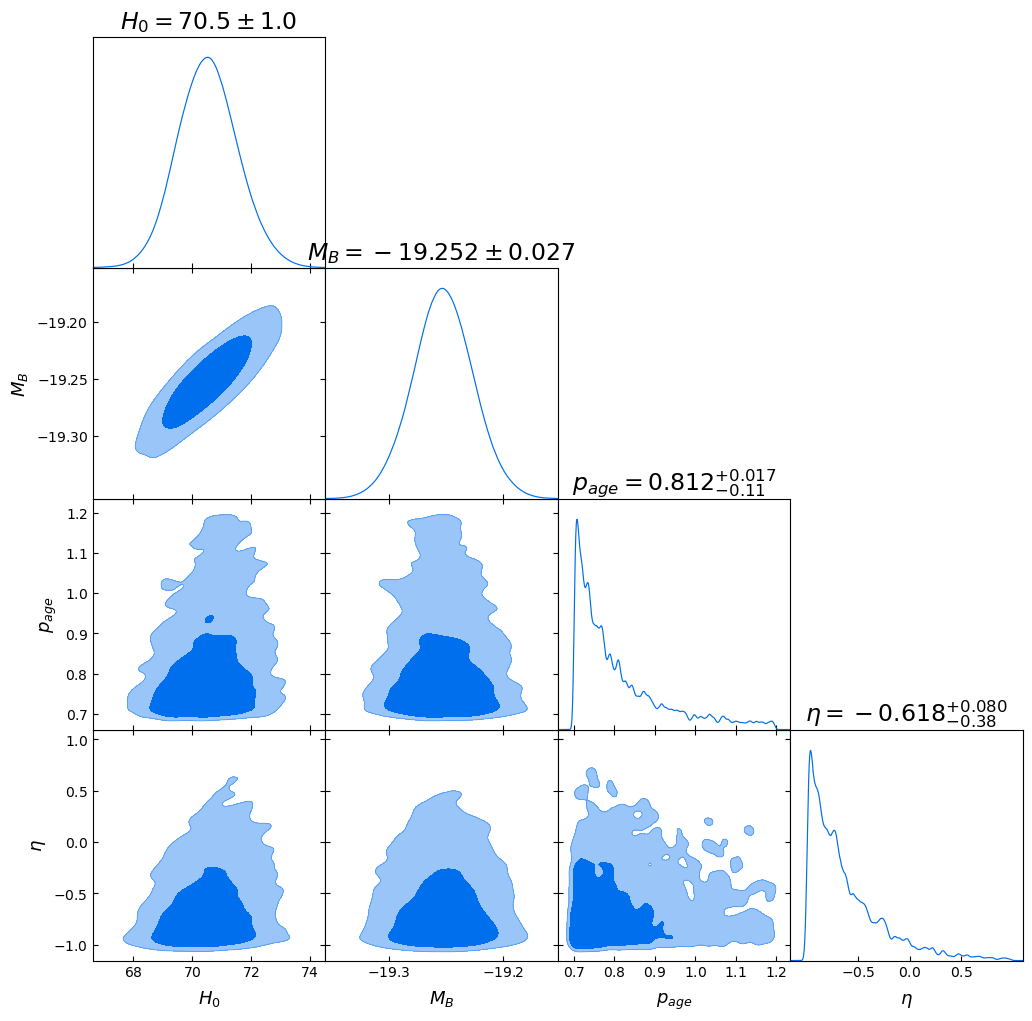

In [3]:
PAge = emcee.backends.HDFBackend("../Chains/MB(SH0ES)+LocalSN/PAge.h5",
                                 read_only=True)
tau = PAge.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))

flatchainPAge = PAge.get_chain(discard=burnin, flat=True, thin=thin)
loglikevalues = PAge.get_log_prob(discard=burnin, flat=True, thin=thin)
parmPAge = tuple(['H_0', 'M_B', 'p_{age}', '\eta'])
flatPAge = MCSamples(samples=flatchainPAge, names=parmPAge, labels=parmPAge)
g = plots.get_subplot_plotter()
g.settings.subplot_size_inch = 3
g.settings.title_limit_fontsize = 18
g.triangle_plot(flatPAge, filled=True, title_limit=1)
print("min chi square is :", -2 * max(loglikevalues))

Removed no burn in
min chi square is : 431.70778861707134


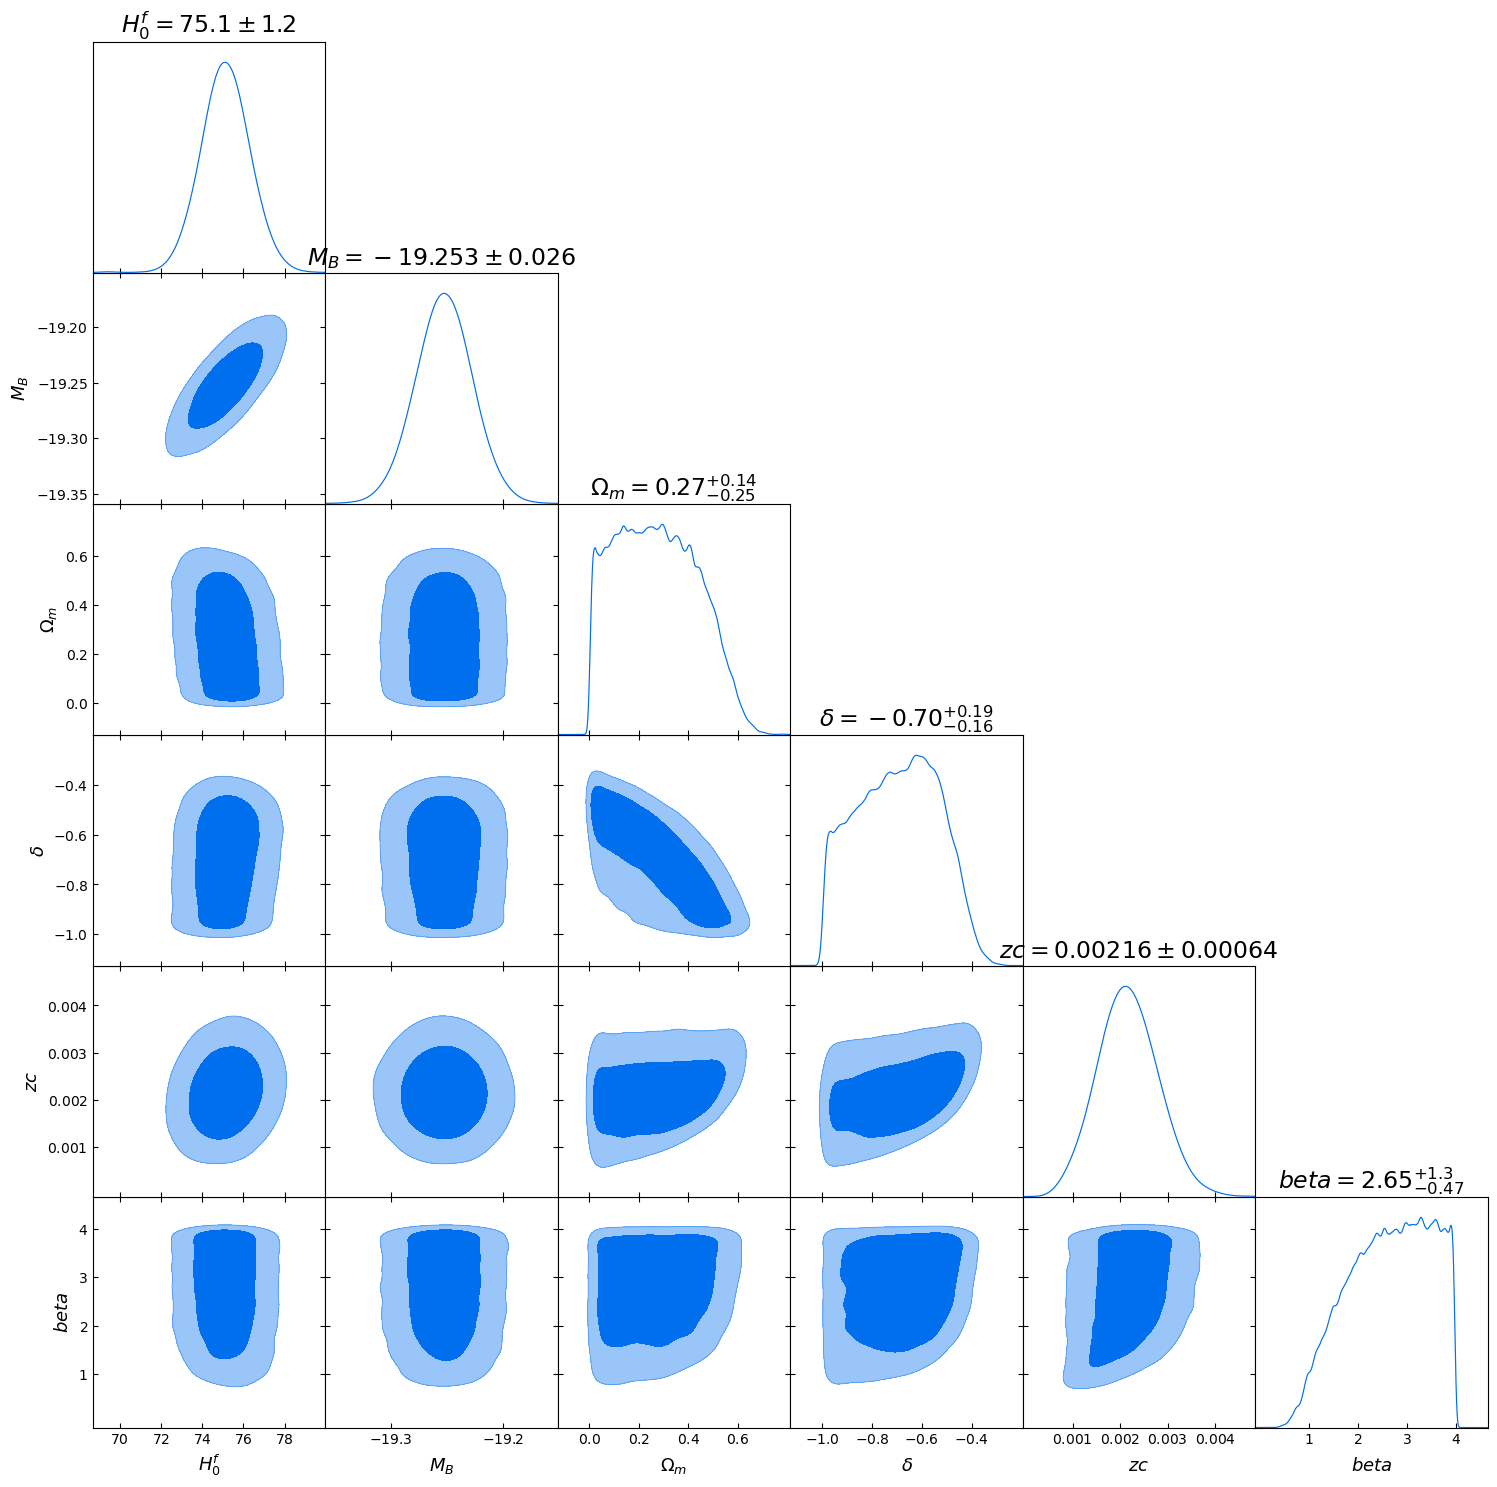

In [4]:
PDE = emcee.backends.HDFBackend('../Chains/MB(SH0ES)+LocalSN/PDE.h5',
                                read_only=True)
tau = PDE.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))

flatchainPDE = PDE.get_chain(discard=burnin, flat=True, thin=thin)
loglikevalues = PDE.get_log_prob(discard=burnin, flat=True, thin=thin)
parmPDE = tuple(['H_0^f', 'M_B', '\Omega_m', '\delta', 'zc', 'beta'])
flatPDE = MCSamples(samples=flatchainPDE, names=parmPDE, labels=parmPDE)
g = plots.get_subplot_plotter()
g.settings.subplot_size_inch = 3
g.settings.title_limit_fontsize = 18
g.triangle_plot(flatPDE, ['H_0^f', 'M_B', '\Omega_m', '\delta', 'zc', "beta"],
                filled=True,
                title_limit=1)
print("min chi square is :", -2 * max(loglikevalues))

Removed no burn in


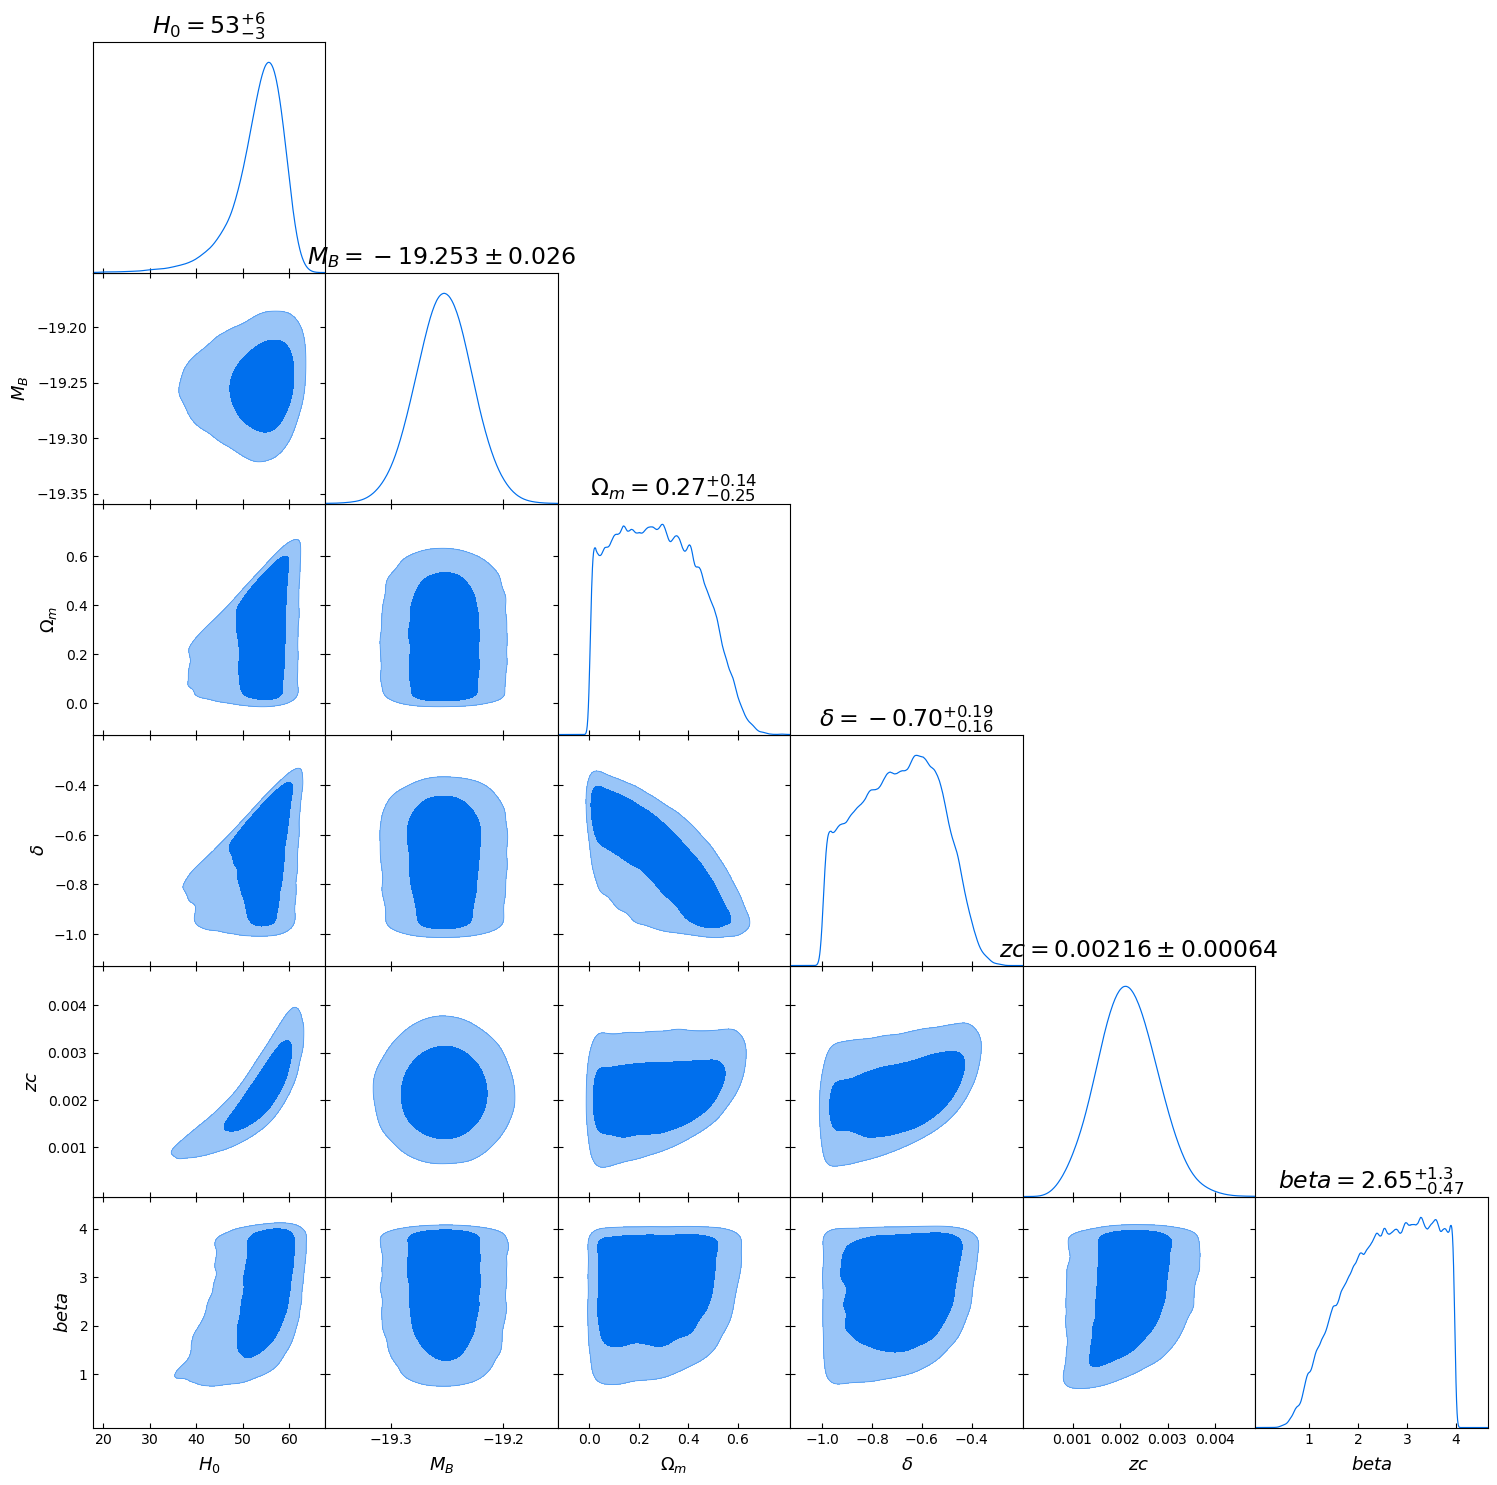

In [5]:
PDE = emcee.backends.HDFBackend('../Chains/MB(SH0ES)+LocalSN/PDE.h5',
                                read_only=True)
tau = PDE.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))

flatchainPDE = PDE.get_chain(discard=burnin, flat=True, thin=thin)

Hf0 = flatchainPDE[:, 0]
MB = flatchainPDE[:, 1]
Om = flatchainPDE[:, 2]
delta = flatchainPDE[:, 3]
zc = flatchainPDE[:, 4]
beta = flatchainPDE[:, 5]


def PDE_Hz(Om, delta, zc, beta, z):
    OmL = 1 - Om
    Ez = np.sqrt(Om * (1 + z)**3 + OmL * (1 + delta * np.exp(-(z / zc)**beta)))
    return Ez


flatchain_H0 = PDE_Hz(Om, delta, zc, beta, 0) * Hf0
flatchainPDE[:, 0] = flatchain_H0

parmPDE = tuple(['H_0', 'M_B', '\Omega_m', '\delta', 'zc', 'beta'])
flatPDEnow = MCSamples(samples=flatchainPDE, names=parmPDE, labels=parmPDE)

g = plots.get_subplot_plotter()
g.settings.subplot_size_inch = 3
g.settings.title_limit_fontsize = 18
g.settings.num_plot_contours = 2
g.triangle_plot(flatPDEnow, ['H_0', 'M_B', '\Omega_m', '\delta', 'zc', "beta"],
                filled=True,
                title_limit=1)